# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ You are strongly advised to:
* 💾 download the solution for yesterday's optional `distance_seller_customer` function if you didn't have time to code it
* 👥 copy-paste it into your `olist/orders.py` file



👇 First things first, import the `orders` dataset

In [3]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

<AxesSubplot:>

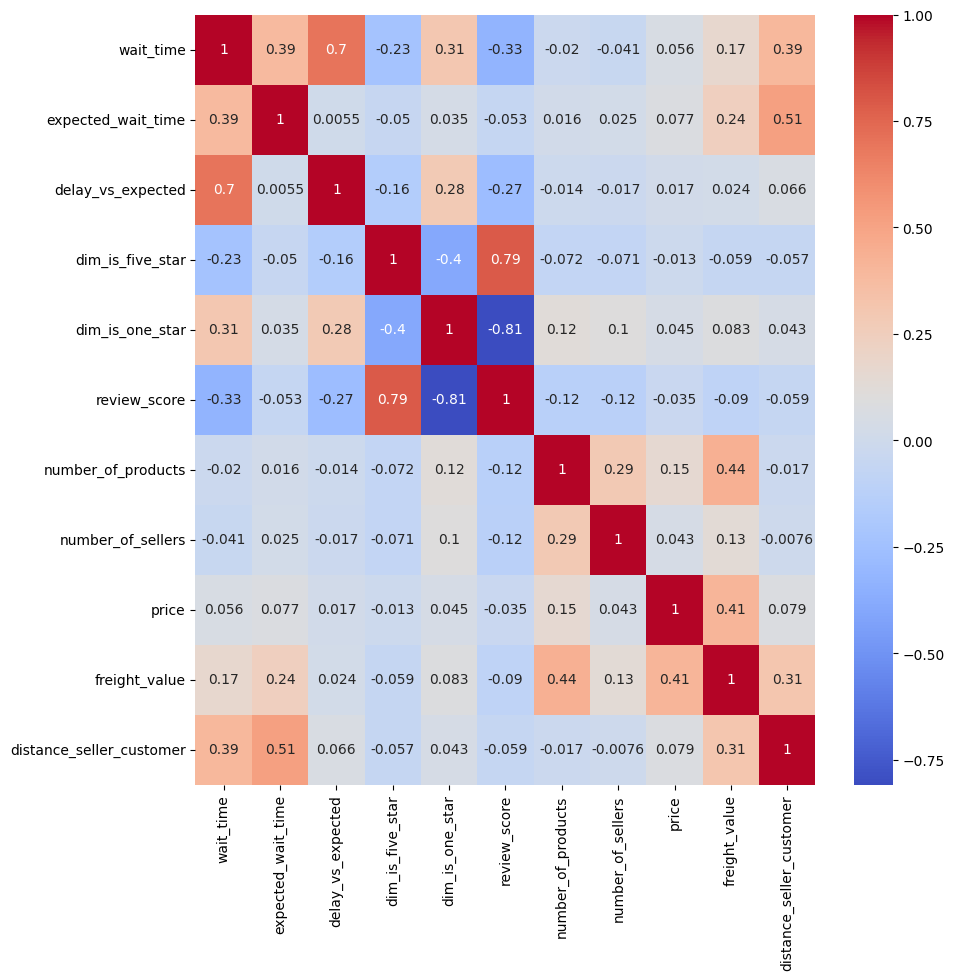

In [4]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals`

***Model 1***:

In [5]:
# R Square is a basic matrix which tells you about that how much variance is been explained by the model.
# However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, 
# ...even if they do not have any relationship with the output variables

# Adjusted R-square penalizes you for adding variables which do not improve your existing model.

# Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. 
# In case you only have one input variable, R-square and Adjusted R squared would be exactly same.

In [6]:
import statsmodels.formula.api as smf

model1 = smf.ols('delay_vs_expected ~ review_score', data=orders)

In [7]:
res = model1.fit()

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delay_vs_expected   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:51:35   Log-Likelihood:            -2.7982e+05
No. Observations:               95872   AIC:                         5.596e+05
Df Residuals:                   95870   BIC:                         5.597e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8544      0.049     99.113      0.000       4.758       4.950
review_score    -0.9869      0.011    -87.644      0.000      -1.009      -0.965
==============================================================================
Omnibus:                   191632.630   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        753292373.178
Skew:                          16.300   Prob(JB):                         0.00
Kurtosis:                     436.026   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [9]:
model2 = smf.ols(formula='wait_time ~ review_score', data=orders)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wait_time   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:51:37   Log-Likelihood:            -3.4574e+05
No. Observations:               95872   AIC:                         6.915e+05
Df Residuals:                   95870   BIC:                         6.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.7259      0.097    233.282      0.000      22.535      22.917
review_score    -2.4576      0.022   -109.730      0.000      -2.501      -2.414
==============================================================================
Omnibus:                    81532.766   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7575459.067
Skew:                           3.608   Prob(JB):                         0.00
Kurtosis:                      45.946   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [10]:
model3 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected', data=orders)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:51:41   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.008    601.568      0.000       4.635       4.665
wait_time            -0.0383      0.001    -65.969      0.000      -0.039      -0.037
delay_vs_expected    -0.0205      0.001    -17.417      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19995.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40513.333
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓Can you notice the difference with the **simple regression** coefficients computed with *seaborn* above? 

❓What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


> YOUR ANSWER HERE

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ Let's try to add more features to our regression to improve the explainability of the linear regression.

👉 Create a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Do not create **data leaks**: do not add features that are directly derived from the `review_score`
- ⚠️ Do not add two features perfectly collinear with each other
- ⚖️  Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ won't be in the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

In [11]:
# Perform collinear check

In [12]:
numeric_cols = orders.select_dtypes(exclude='object')

In [13]:
columns = numeric_cols.columns
features = list(columns)
features

['wait_time',
 'expected_wait_time',
 'delay_vs_expected',
 'dim_is_five_star',
 'dim_is_one_star',
 'review_score',
 'number_of_products',
 'number_of_sellers',
 'price',
 'freight_value',
 'distance_seller_customer']

In [14]:
# standardise features
orders_standardised = orders.copy()

for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardised[f] = orders[f].map(lambda x: (mu-x)/sigma)

In [15]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('review_score ~ ' + ' + '.join(features), data=orders_standardised, return_type='dataframe')

In [16]:
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

In [17]:
#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [18]:
vif_df

,variable,VIF
0,Intercept,1.000000
1,wait_time,3.229729
2,expected_wait_time,1.607475
3,delay_vs_expected,2.466969
4,dim_is_five_star,4.942408
5,dim_is_one_star,5.315187
6,review_score,12.130217
7,number_of_products,1.384804
8,number_of_sellers,1.109713
9,price,1.209265


***Model 4***:

❓ What features would you like to consider ?

In [19]:
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer"
]

⚖️ Standardize your features.

*Do you remember why we need to perform this operation before running a `Multivariate regression` ?*

<details>
    <summary>- 💡 Answer 💡-</summary>

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if you have a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

📅 When we will discover Machine Learning Algorithms, we will also need to perform some scaling operations before trying to predict any target.

In [24]:
orders_standardised = orders.copy()

for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardised[f] = orders[f].map(lambda x: (x - mu) / sigma)

In [25]:
orders_standardised

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431192,15.544063,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.513802,-0.652038,-1.042253
1,53cdb2fc8bc7dce0b6741e2150273451,0.134174,19.137766,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.086640,0.000467,0.203930
2,47770eb9100c2d0c44946d9cf07ec65d,-0.329907,26.639711,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.111748,-0.164053,-0.365480
3,949d5b44dbf5de918fe9c16f97b45f8a,0.073540,26.188819,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.441525,0.206815,2.123085
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.019535,12.112049,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.562388,-0.652038,-1.013580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,-0.454309,18.587442,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.311513,-0.449408,-0.926554
95876,63943bddc261676b46f01ca7ac2f7bd8,1.023841,23.459051,-0.161781,delivered,0,0,4,-0.264595,-0.112544,0.183977,-0.123156,-0.088484
95877,83c1379a015df1e13d02aae0204711ab,1.305780,30.384225,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.333684,1.964490,0.818550
95878,11c177c8e97725db2631073c19f07b62,0.483664,37.105243,-0.161781,delivered,0,0,2,1.601605,-0.112544,1.075186,2.715522,-0.304640


👉 Create your `model4` and train it.

In [26]:
model4 = smf.ols(formula='review_score ~ ' + ' + '.join(features), data=orders_standardised).fit()

In [27]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2317.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:53:26   Log-Likelihood:            -1.5259e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.053e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1555      0.004   1082.564      0.000       4.148       4.163
wait_time                   -0.4383      0.006    -70.339      0.000      -0.451      -0.426
delay_vs_expected           -0.0528      0.006     -9.241      0.000      -0.064      -0.042
number_of_products          -0.1304      0.004    -29.022      0.000      -0.139      -0.122
number_of_sellers           -0.1315      0.004    -32.760      0.000      -0.139      -0.124
price                       -0.0034      0.004     -0.806      0.420      -0.012       0.005
freight_value                0.0059      0.005      1.192      0.233      -0.004       0.016
distance_seller_customer     0.0935      0.005     20.267      0.000       0.084       0.103
==============================================================================
Omnibus:                    18762.576   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37940.770
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       4.994   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

<AxesSubplot:>

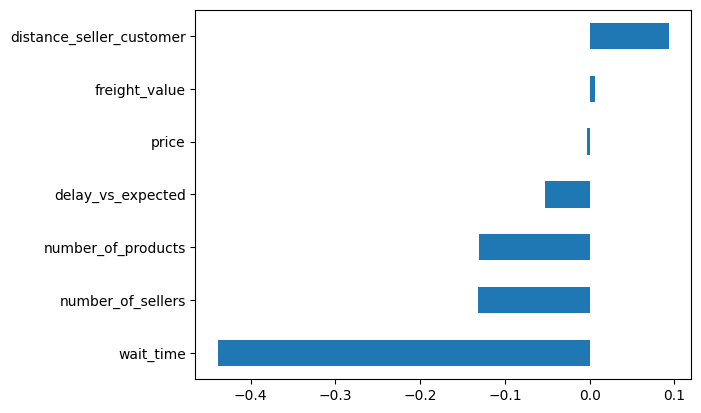

In [57]:
model4.params[1:].sort_values().plot(kind='barh')

<details>
    <summary>- 💡Explanations 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explainability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [42]:
predicted_review_score = model4.predict(orders_standardised[features])

In [43]:
residuals = predicted_review_score - orders_standardised.review_score
residuals

0        0.302818
1        0.173899
2       -0.677553
3       -0.617684
4       -0.436440
           ...   
95875   -0.675723
95876   -0.245069
95877   -1.272027
95878    1.741890
95879   -0.572762
Length: 95872, dtype: float64

🧮 Compute the associated RMSE.

In [46]:
rmse = (residuals ** 2).mean()**0.5
rmse

1.1884979707470817

📊 Plot the `residuals` in a histogram.

Text(0.5, 1.0, 'residuals density plot')

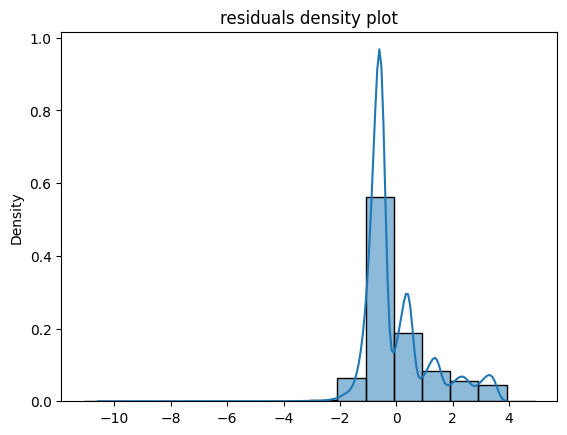

In [52]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

❓ Can you guess why the residual distplot has such a strange shape? 

*Hint:*<br/>
👉 Plot, on the same graph, both the distribution of the `review_score` and the distribution of the `predicted_review_score`.

Text(0.5, 1.0, 'distribution of predicted vs actual values')

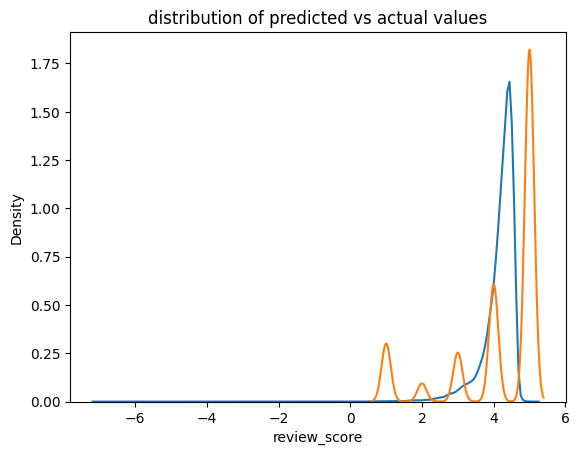

In [54]:
sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(orders.review_score, label='actual review scores')   
plt.title('distribution of predicted vs actual values')         

📈 Actually, using `seaborn`, we could have already plotted a `regression line` of the `review_score` vs. the `delay_vs_expected`

Do it once with a sub-`sample` of the population, and once with the `entire population`.

(0.0, 5.607109748214589)

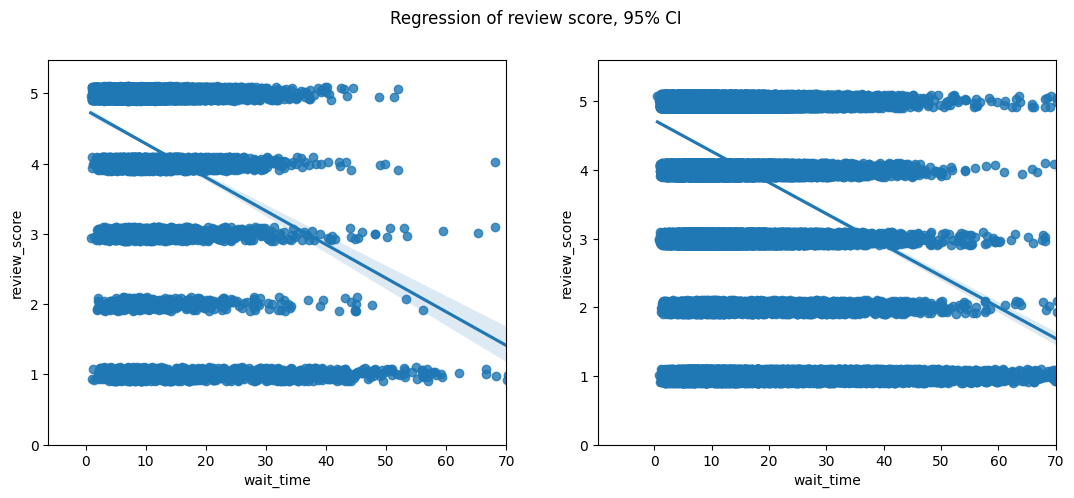

In [55]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review score, 95% CI')
plt.subplot(1,2,1)
sns.regplot(x=sample.wait_time, y=sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x=orders.wait_time, y=orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)


☝️ You can see that it is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 In the next session, you will discover a new model: the `Logistic Regression` which, despite its name, is a `Classification Algorithm` 

☝️ So in the end, our model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `review_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.

🏁 Great job! 

💾 Don't forget to *save*, *commit* and *push* this notebook when you are done!